# Heart Disease Risk Prediction

## Objective
### The goal of this project is to build a machine learning model that predicts the likelihood of heart disease based on patient health metrics.

### Importing required libraries for the Machine Learning Workflow

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [2]:
df = pd.read_csv('heart_data.csv')
df.head(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [3]:
df.tail(5)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


### Checking numbers of rows and columns in data set

In [4]:
df.shape

(1190, 12)

In [5]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### Checking for Missing or Zero Values

In [6]:
(df == 0.0).sum()


age                      0
sex                    281
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar    936
resting ecg            684
max heart rate           0
exercise angina        729
oldpeak                455
ST slope                 1
target                 561
dtype: int64

### Exploring Data Types and Target Distribution

In [7]:
print(df.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


In [8]:
print(df['target'].value_counts())

target
1    629
0    561
Name: count, dtype: int64


### Visualizes how categorical features relate to heart disease. For example, the sex countplot shows the number of males and females with or without heart disease, helping identify patterns and important features for prediction.

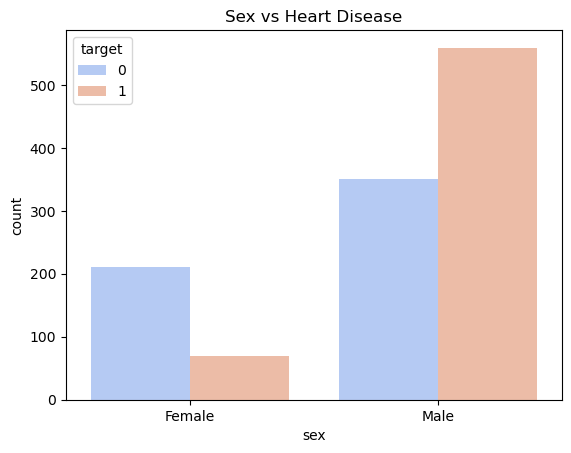

In [9]:
sns.countplot(x='sex', hue='target', data=df, palette='coolwarm')
plt.title("Sex vs Heart Disease")
plt.xticks([0,1], ['Female','Male'])
plt.show()

### Correlation Heatmap
#### Shows how features are correlated with each other and with the target.

#### Helps in understanding which features may be more important for prediction.

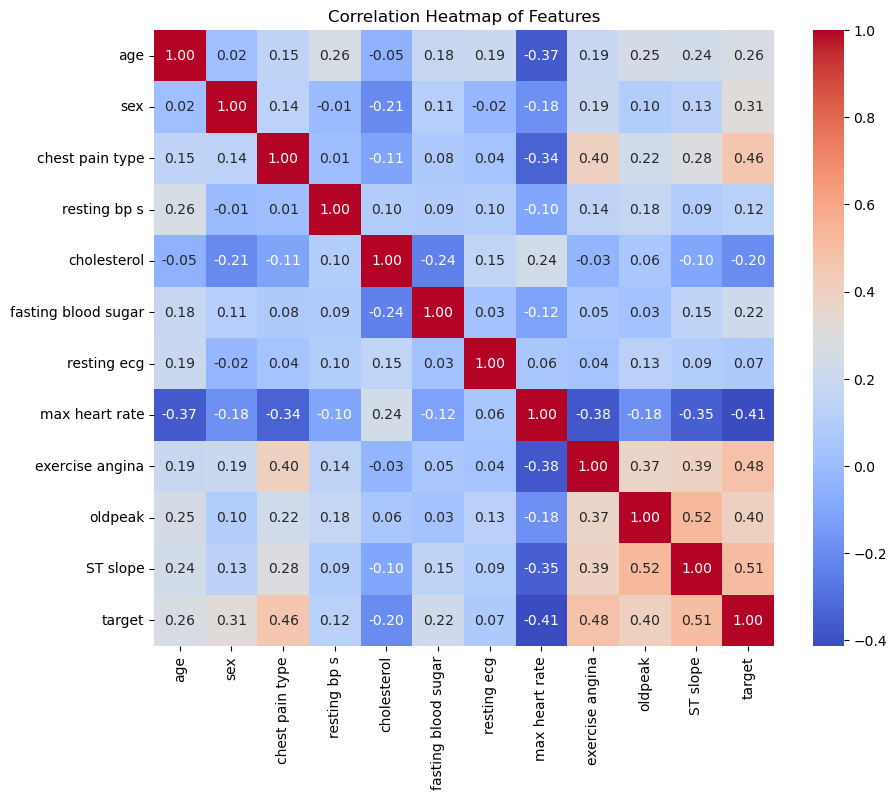

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest pain type'}>],
       [<Axes: title={'center': 'resting bp s'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting blood sugar'}>],
       [<Axes: title={'center': 'resting ecg'}>,
        <Axes: title={'center': 'max heart rate'}>,
        <Axes: title={'center': 'exercise angina'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'ST slope'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

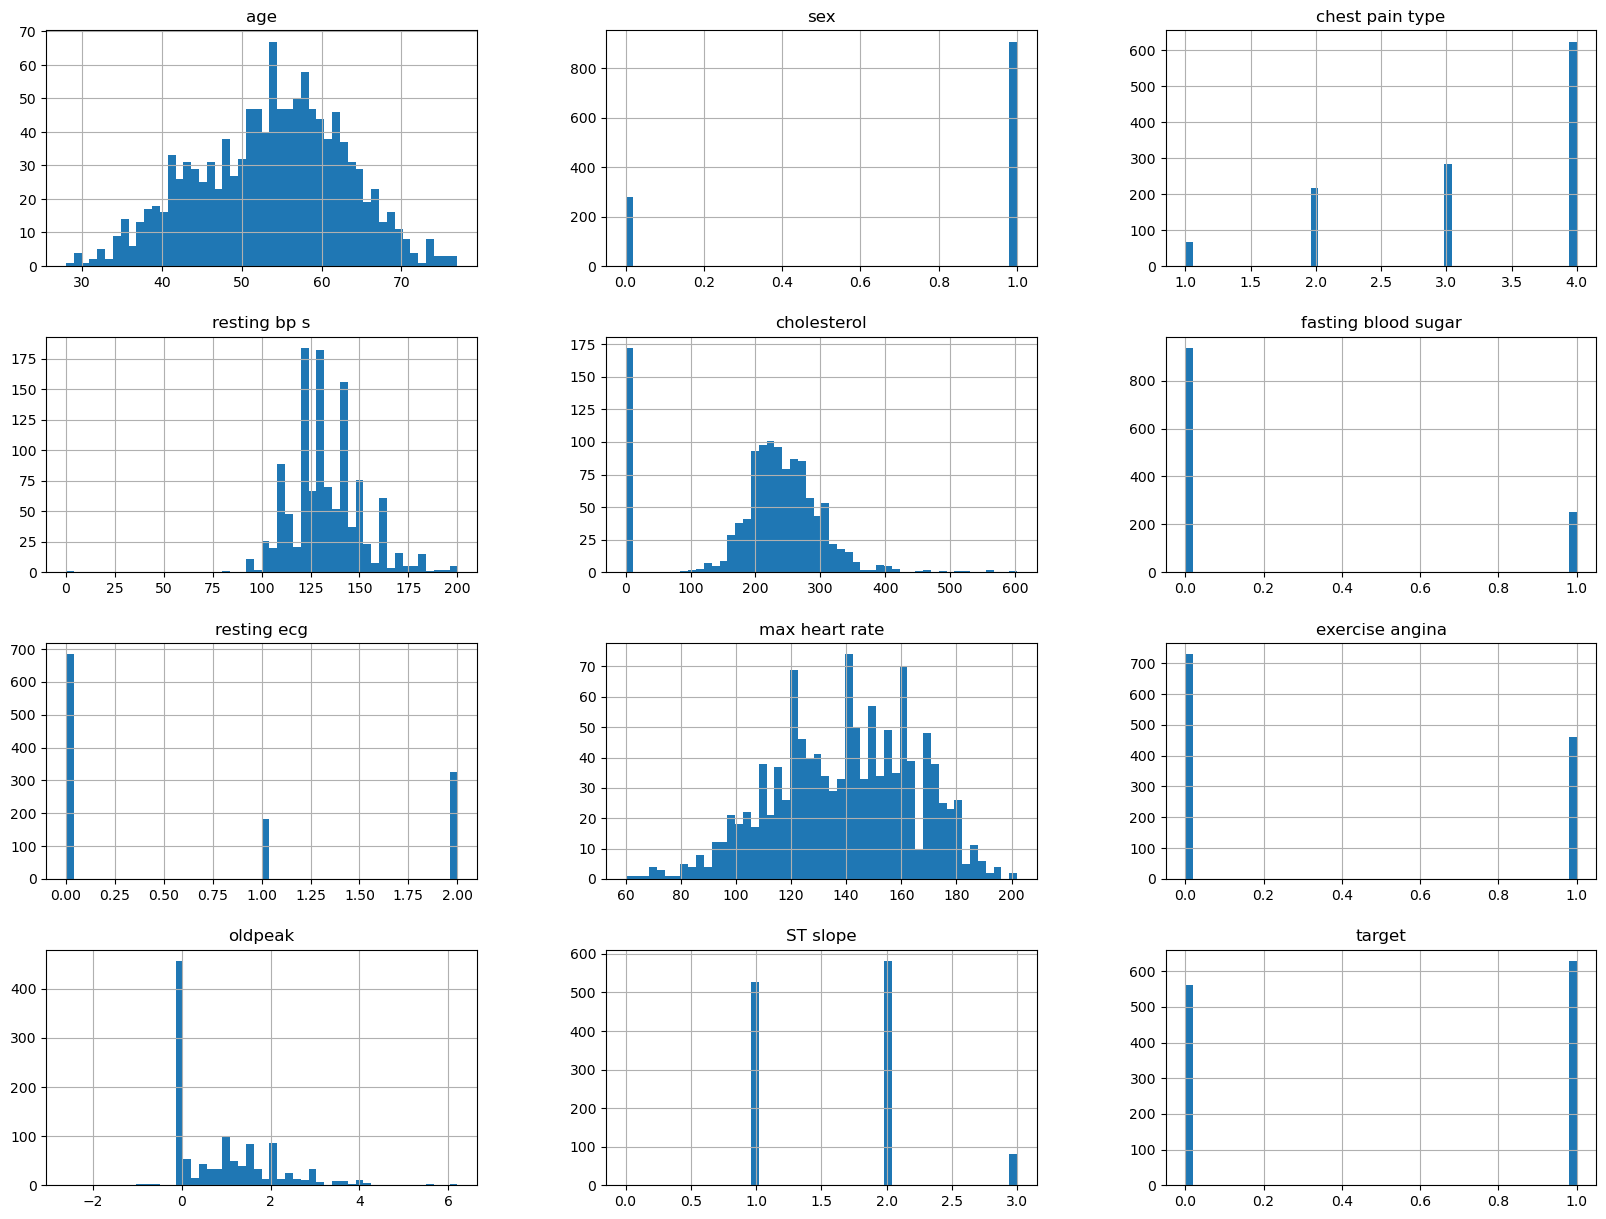

In [11]:
df.hist(bins = 50, figsize = (20,15))

In [12]:
(df == 0.0).sum()

age                      0
sex                    281
chest pain type          0
resting bp s             1
cholesterol            172
fasting blood sugar    936
resting ecg            684
max heart rate           0
exercise angina        729
oldpeak                455
ST slope                 1
target                 561
dtype: int64

### Handling Missing/Zero Values
#### Replaces 0 values in cholesterol with the median of non-zero cholesterol values.

#### This avoids biasing the model with invalid zeros.

In [13]:
median_cholesterol = df[df['cholesterol'] > 0] ['cholesterol'].median()
print(median_cholesterol)


240.0


In [14]:
df['cholesterol'] = df['cholesterol'].replace(0, median_cholesterol)

finding data where their values is 0.0

In [15]:
(df == 0.0).sum()

age                      0
sex                    281
chest pain type          0
resting bp s             1
cholesterol              0
fasting blood sugar    936
resting ecg            684
max heart rate           0
exercise angina        729
oldpeak                455
ST slope                 1
target                 561
dtype: int64

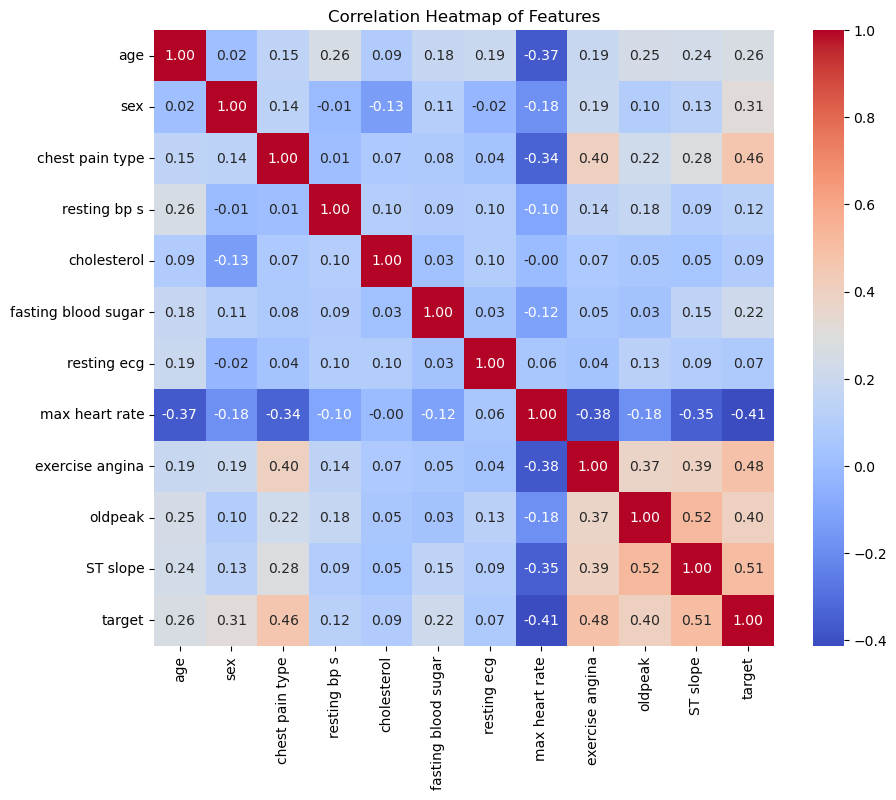

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Dropping Less Useful Features ie, negative correlated columns 
#### Keeps the dataset clean and reduces noise.

In [17]:
df1 = df.drop([ 'resting bp s', 'cholesterol',
               'fasting blood sugar', 'resting ecg', 'max heart rate'], axis=1)


In [18]:
df1

,age,sex,chest pain type,exercise angina,oldpeak,ST slope,target
0,40,1,2,0,0.0,1,0
1,49,0,3,0,1.0,2,1
2,37,1,2,0,0.0,1,0
3,48,0,4,1,1.5,2,1
4,54,1,3,0,0.0,1,0
...,...,...,...,...,...,...,...
1185,45,1,1,0,1.2,2,1
1186,68,1,4,0,3.4,2,1
1187,57,1,4,1,1.2,2,1
1188,57,0,2,0,0.0,2,1


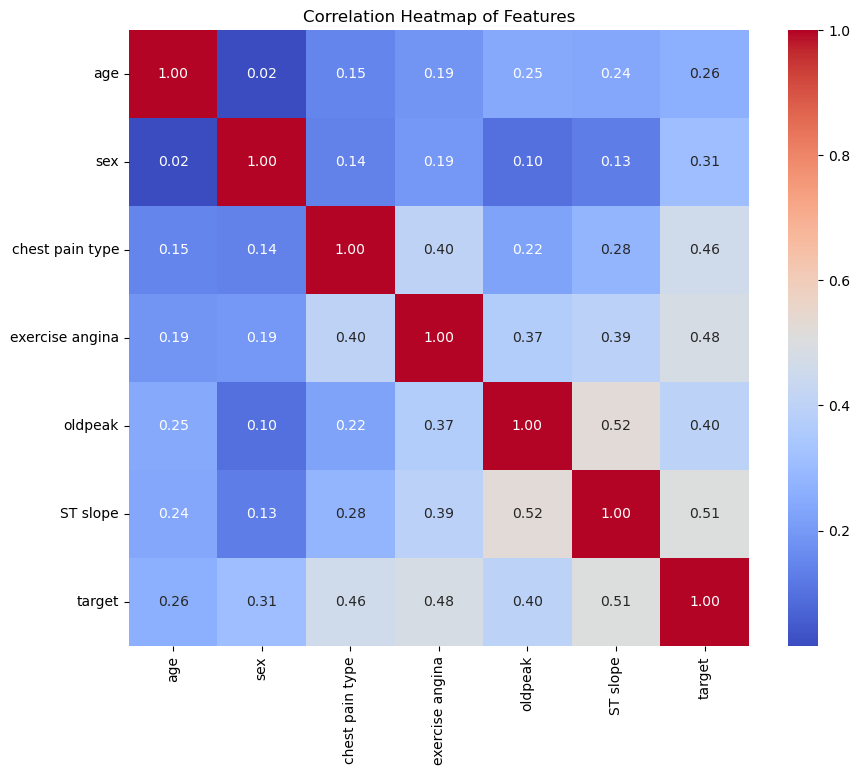

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

### Checking Data Distribution
#### Prints the distribution of values for each column.
#### Helps understand categorical feature balance.

In [42]:
for col in df1.columns:
    print(f"\nColumn: {col}")
    print(df1[col].value_counts())


Column: age
age
54    67
58    58
57    50
52    47
55    47
59    47
56    47
51    47
62    46
60    44
53    40
48    38
61    38
63    37
41    33
50    32
64    31
43    31
46    31
44    29
65    29
49    27
42    26
45    25
67    23
47    23
66    19
39    18
38    17
69    16
40    16
35    14
37    13
68    13
70    11
34     9
74     8
71     8
36     6
32     5
72     4
29     4
77     3
75     3
76     3
33     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

Column: sex
sex
1    909
0    281
Name: count, dtype: int64

Column: chest pain type
chest pain type
4    625
3    283
2    216
1     66
Name: count, dtype: int64

Column: exercise angina
exercise angina
0    729
1    461
Name: count, dtype: int64

Column: oldpeak
oldpeak
 0.0    455
 1.0     98
 2.0     84
 1.5     58
 1.2     40
 0.2     33
 3.0     32
 1.4     31
 1.6     27
 1.8     27
 0.8     27
 0.6     26
 0.5     24
 0.1     20
 0.4     19
 2.5     18
 0.3     14
 2.6     13
 1.9     12
 2.8 

In [43]:
print(df.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


### Train-Test Split
#### Splits the data into training set (80%) and testing set (20%)

In [22]:
from sklearn.model_selection import train_test_split

X = df1.drop('target', axis=1)
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45, stratify=y  # stratify keeps balance
)

print("Train target distribution:\n", y_train.value_counts())
print("Test target distribution:\n", y_test.value_counts())

Train target distribution:
 target
1    503
0    449
Name: count, dtype: int64
Test target distribution:
 target
1    126
0    112
Name: count, dtype: int64


In [23]:
for col in ['sex', 'chest pain type', 'exercise angina', 'ST slope','oldpeak']:
    print(f"\n{col} - Train:")
    print(X_train[col].value_counts(normalize=True))
    print(f"{col} - Test:")
    print(X_test[col].value_counts(normalize=True))


sex - Train:
sex
1    0.77521
0    0.22479
Name: proportion, dtype: float64
sex - Test:
sex
1    0.718487
0    0.281513
Name: proportion, dtype: float64

chest pain type - Train:
chest pain type
4    0.526261
3    0.243697
2    0.175420
1    0.054622
Name: proportion, dtype: float64
chest pain type - Test:
chest pain type
4    0.521008
3    0.214286
2    0.205882
1    0.058824
Name: proportion, dtype: float64

exercise angina - Train:
exercise angina
0    0.617647
1    0.382353
Name: proportion, dtype: float64
exercise angina - Test:
exercise angina
0    0.592437
1    0.407563
Name: proportion, dtype: float64

ST slope - Train:
ST slope
2    0.489496
1    0.445378
3    0.064076
0    0.001050
Name: proportion, dtype: float64
ST slope - Test:
ST slope
2    0.487395
1    0.428571
3    0.084034
Name: proportion, dtype: float64

oldpeak - Train:
oldpeak
 0.0    0.383403
 1.0    0.084034
 2.0    0.069328
 1.5    0.047269
 1.2    0.036765
 0.2    0.029412
 1.4    0.027311
 3.0    0.026261
 0

### Handling Negative Values
#### Replaces negative values in oldpeak with 0.

#### Negative values are invalid in this context.

In [24]:
X['oldpeak'] = X['oldpeak'].apply(lambda x: 0 if x < 0 else x)
X_train['oldpeak'] = X_train['oldpeak'].apply(lambda x: 0 if x < 0 else x)
X_test['oldpeak']  = X_test['oldpeak'].apply(lambda x: 0 if x < 0 else x)

In [25]:
print(df1['oldpeak'])

0       0.0
1       1.0
2       0.0
3       1.5
4       0.0
       ... 
1185    1.2
1186    3.4
1187    1.2
1188    0.0
1189    0.0
Name: oldpeak, Length: 1190, dtype: float64


In [26]:
for col in ['oldpeak']:
    print(f"\n{col} - Train:")
    print(X_train[col].value_counts(normalize=True))
    print(f"{col} - Test:")
    print(X_test[col].value_counts(normalize=True))


oldpeak - Train:
oldpeak
0.0    0.393908
1.0    0.084034
2.0    0.069328
1.5    0.047269
1.2    0.036765
0.2    0.029412
1.4    0.027311
3.0    0.026261
0.8    0.025210
1.6    0.022059
1.8    0.021008
0.5    0.021008
0.4    0.018908
0.6    0.018908
2.5    0.016807
0.1    0.014706
0.3    0.011555
1.9    0.011555
2.8    0.009454
2.6    0.008403
4.0    0.007353
0.7    0.007353
2.4    0.007353
1.3    0.006303
1.1    0.006303
2.2    0.006303
0.9    0.005252
3.4    0.005252
1.7    0.004202
3.6    0.004202
2.1    0.003151
2.3    0.003151
3.2    0.003151
5.6    0.002101
3.1    0.002101
6.2    0.002101
4.2    0.002101
3.8    0.002101
3.5    0.002101
4.4    0.001050
5.0    0.001050
2.9    0.001050
3.7    0.001050
Name: proportion, dtype: float64
oldpeak - Test:
oldpeak
0.0    0.390756
1.0    0.075630
2.0    0.075630
1.5    0.054622
0.6    0.033613
3.0    0.029412
1.8    0.029412
0.1    0.025210
1.6    0.025210
0.2    0.021008
1.2    0.021008
1.4    0.021008
2.6    0.021008
0.5    0.016807
3.6  

In [27]:
df1_train = X_train.copy()
df1_train['target'] = y_train
df1_test = X_test.copy()
df1_test['target'] = y_test

### Comparing Feature Distribution in Train vs Test
#### Plots bar charts for selected categorical features (sex, chest pain type, exercise angina, ST slope) to verify that train and test distributions are similar.

<Figure size 800x400 with 0 Axes>

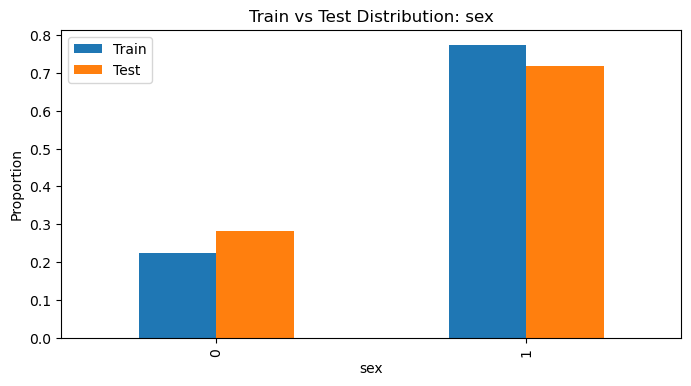

<Figure size 800x400 with 0 Axes>

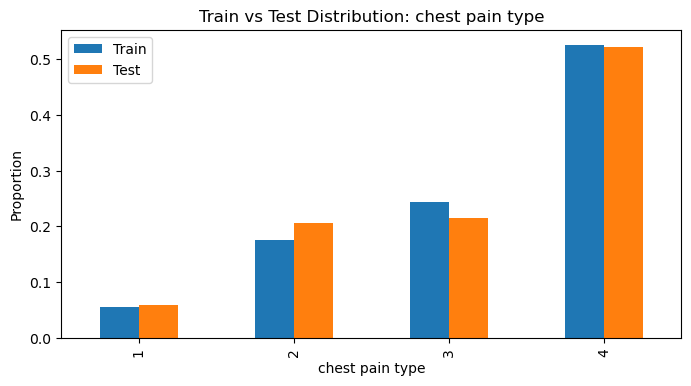

<Figure size 800x400 with 0 Axes>

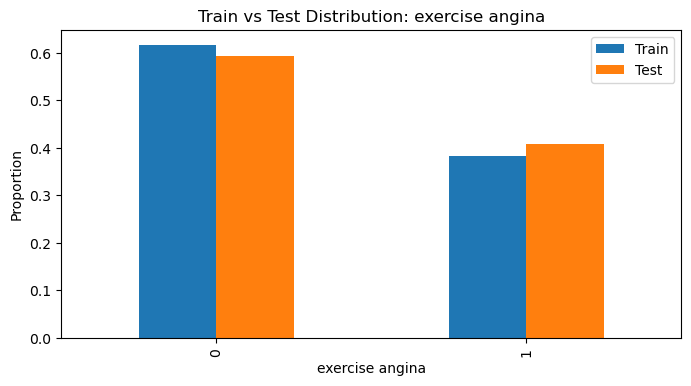

<Figure size 800x400 with 0 Axes>

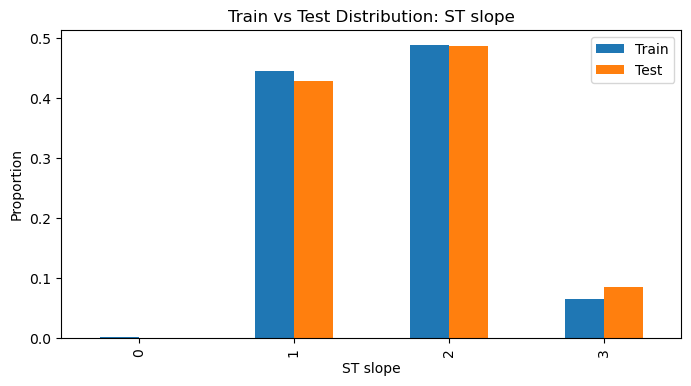

In [28]:
cols = ['sex', 'chest pain type', 'exercise angina', 'ST slope']

for col in cols:
    plt.figure(figsize=(8,4))
    train_counts = df1_train[col].value_counts(normalize=True).sort_index()
    test_counts  = df1_test[col].value_counts(normalize=True).sort_index()
    df_plot = pd.DataFrame({'Train': train_counts, 'Test': test_counts})
    df_plot.plot(kind='bar', figsize=(8,4))
    plt.title(f'Train vs Test Distribution: {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('model', LogisticRegression())    
])

# Train
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8529411764705882


In [30]:
from sklearn.tree import DecisionTreeClassifier

# Pipeline
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),          # optional for DT but keeps uniformity
    ('dt', DecisionTreeClassifier(random_state=45))
])

# Fit
pipe_dt.fit(X_train[cols], y_train)

# Predict
y_pred_dt = pipe_dt.predict(X_test[cols])

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8529411764705882


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Random Forest pipeline
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),  # optional for tree-based models
    ('rf', RandomForestClassifier(n_estimators=100, random_state=45))
])

# Train
pipe_rf.fit(X_train, y_train)

# Predict
y_pred_rf = pipe_rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.81      0.84       112
           1       0.84      0.90      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.85      0.86       238
weighted avg       0.86      0.86      0.86       238



In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression pipeline
pipe_lr_model = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

# Train
pipe_lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = pipe_lr_model.predict(X_test)

# Evaluate

print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

y_pred_lr_bin = (y_pred_lr >= 0.5).astype(int)
from sklearn.metrics import accuracy_score
print("Linear Regression Accuracy (binary):", accuracy_score(y_test, y_pred_lr_bin))


MSE: 0.13756887436408036
R2 Score: 0.44781382373306633
Linear Regression Accuracy (binary): 0.8529411764705882


In [33]:
from sklearn.neighbors import KNeighborsClassifier

# KNN pipeline
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),  # scaling is important for KNN
    ('knn', KNeighborsClassifier(n_neighbors=5))  # you can tune n_neighbors
])

# Train
pipe_knn.fit(X_train, y_train)

# Predict
y_pred_knn = pipe_knn.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8235294117647058


In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=200,    # number of trees
    learning_rate=0.1,   # step size shrinkage
    max_depth=3,         # depth of each tree
    random_state=45
)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.8403361344537815

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       112
           1       0.86      0.83      0.85       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



In [35]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary to store your models and predictions
models_preds = {
    'Logistic Regression': y_pred,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Linear Regression (binary)': y_pred_lr_bin,
    'K-Nearest Neighbors': y_pred_knn,
    'Gradient Boosting': y_pred_gb
}

# Initialize a list to store metrics
metrics_list = []

# Calculate metrics for each model
for model_name, preds in models_preds.items():
    accuracy = accuracy_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    
    
    metrics_list.append({
        'Model': model_name,
        'Accuracy': round(accuracy, 3),
        'Precision': round(precision, 3),
        'Recall': round(recall, 3),
        'F1-score': round(f1, 3),
        
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_list)
metrics_df = metrics_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(metrics_df)


                        Model  Accuracy  Precision  Recall  F1-score
0               Random Forest     0.857      0.843   0.897     0.869
1         Logistic Regression     0.853      0.858   0.865     0.862
2               Decision Tree     0.853      0.858   0.865     0.862
3  Linear Regression (binary)     0.853      0.858   0.865     0.862
4           Gradient Boosting     0.840      0.861   0.833     0.847
5         K-Nearest Neighbors     0.824      0.828   0.841     0.835


                        Model  Accuracy
2               Random Forest  0.857143
0         Logistic Regression  0.852941
1               Decision Tree  0.852941
3  Linear Regression (binary)  0.852941
5           Gradient Boosting  0.840336
4         K-Nearest Neighbors  0.823529


/var/folders/d6/jbdgpdts2dlc2370hmzb47k00000gn/T/ipykernel_90722/1170332741.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_table, palette='viridis')


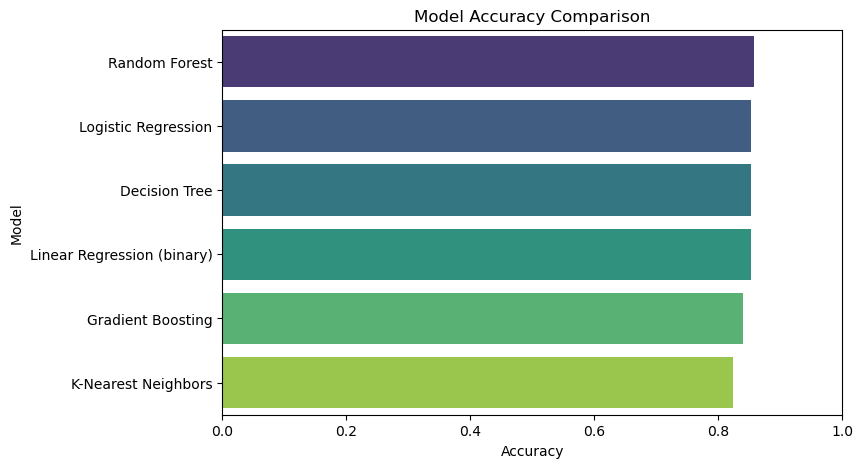

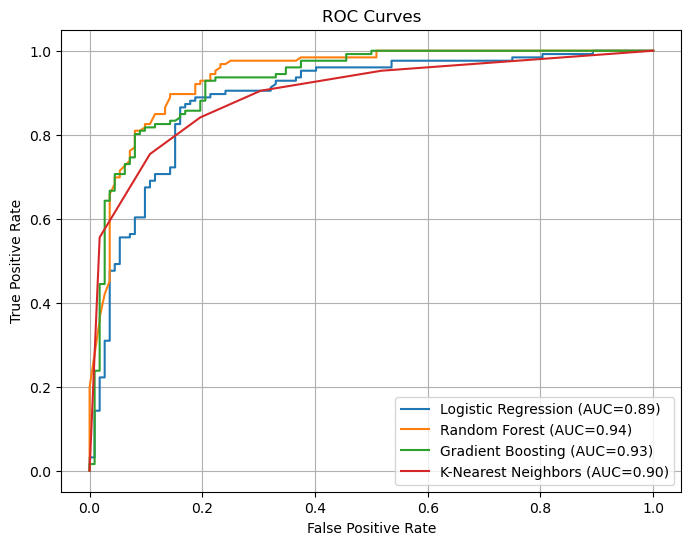

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, accuracy_score

# --- 1. Accuracy Table and Bar Plot ---
accuracy_dict = {
    'Logistic Regression': accuracy_score(y_test, y_pred),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Linear Regression (binary)': accuracy_score(y_test, y_pred_lr_bin),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

accuracy_table = pd.DataFrame(list(accuracy_dict.items()), columns=['Model', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
print(accuracy_table)

# Bar plot
plt.figure(figsize=(8,5))
sns.barplot(x='Accuracy', y='Model', data=accuracy_table, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlim(0,1)
plt.show()

# --- 3. ROC Curves ---
models_proba = {
    'Logistic Regression': pipeline,
    'Random Forest': pipe_rf,
    'Gradient Boosting': gb_model,
    'K-Nearest Neighbors': pipe_knn
}

plt.figure(figsize=(8,6))
for name, model in models_proba.items():
    try:
        y_proba = model.predict_proba(X_test)[:,1]  
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')
    except:
        print(f'{name} skipped (no predict_proba)')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()



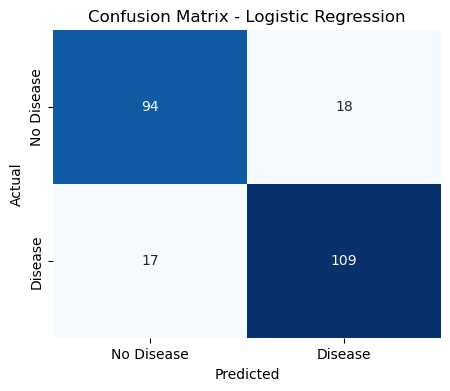

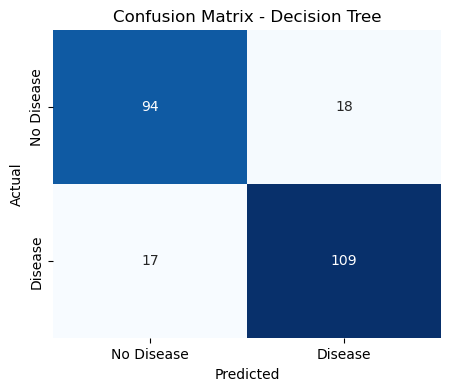

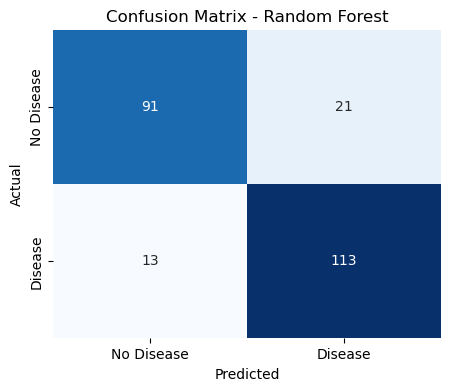

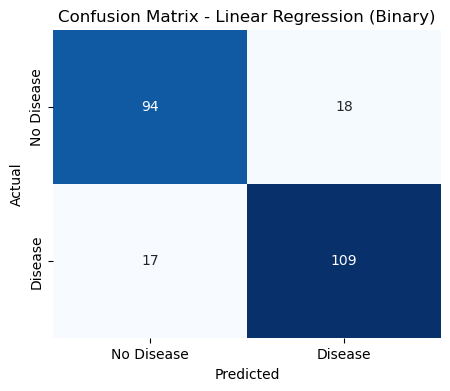

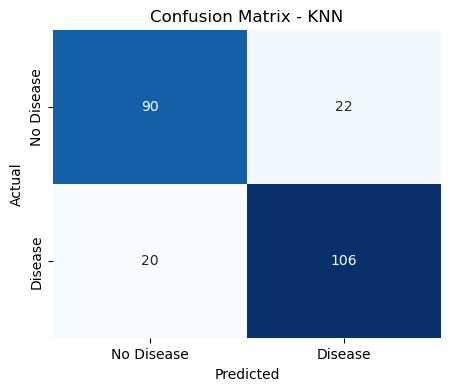

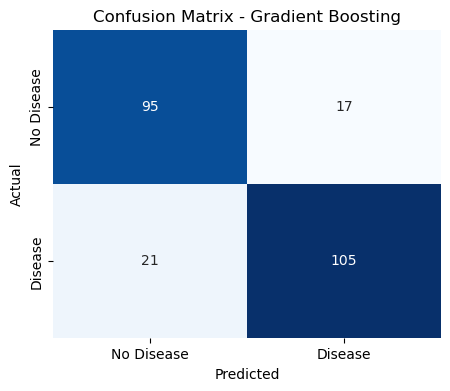

In [37]:
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'],
                yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Example usage for your models:
plot_conf_matrix(y_test, y_pred, "Logistic Regression")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree")
plot_conf_matrix(y_test, y_pred_rf, "Random Forest")
plot_conf_matrix(y_test, y_pred_lr_bin, "Linear Regression (Binary)")
plot_conf_matrix(y_test, y_pred_knn, "KNN")
plot_conf_matrix(y_test, y_pred_gb, "Gradient Boosting")
